Name: Hoziyana Rachel
Customer segmentation 

In [1]:
# Importation of  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [2]:
# Task 1

In [3]:
# Setting plot styles
sns.set_style("whitegrid")

In [4]:
#  Loading the dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\Mall_Customers.csv")
print(df)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:
# Displaying basic statistics
print(df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


The dataset contains 200 mall customers with a diverse range of demographics and spending habits.

Age: Customers span from 18 to 70, with a notable concentration in the younger to middle-aged bracket (28-49 years).

Annual Income: Incomes vary widely from \$15,000 to \$137,000, with an average around \$60,560, indicating a broad economic spectrum among customers.

Spending Score: Scores are broadly distributed from 1 to 99, averaging around 50. The high standard deviation suggests significant variation in spending behavior, making this a key feature for identifying distinct customer segments.

In [6]:
# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


 the data shows no missing values, it is clean

In [7]:
# Converting categorical features to numerical (e.g., 'Gender')
# For 'Gender', we can use one-hot encoding or label encoding.
# Let's use one-hot encoding for demonstration.
df = pd.get_dummies(df, columns=['Gender'], drop_first=True) # drop_first avoids multicollinearity



In [8]:
# Performing data normalization or scaling
# Identifying numerical columns for scaling (excluding 'CustomerID' and one-hot encoded 'Gender_Male')
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


# StandardScaler is generally preferred when you want to transform your data to have a mean of 0 and a standard deviation of 1.so let's use this


scaler = StandardScaler() # Using StandardScaler

df_scaled = df.copy() # Creating a copy to avoid modifying the original DataFrame 'df' directly.

# Applying the scaling to the identified numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nFirst 5 rows of the scaled dataset:")
print(df_scaled.head())


First 5 rows of the scaled dataset:
   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.738999               -0.434801   
1           2 -1.281035           -1.738999                1.195704   
2           3 -1.352802           -1.700830               -1.715913   
3           4 -1.137502           -1.700830                1.040418   
4           5 -0.563369           -1.662660               -0.395980   

   Gender_Male  
0         True  
1         True  
2        False  
3        False  
4        False  


Numbers are Standardized: The Age, Annual Income, and Spending Score values are no longer in their original units. They've been transformed so that they represent how much higher or lower a customer's value is compared to the average, making them fair to compare to each other.

Gender is Numerical: The Gender column has been converted into Gender_Male where True means Male and False means Female, because machine learning models need numbers to work with.


Generating Pair Plots 


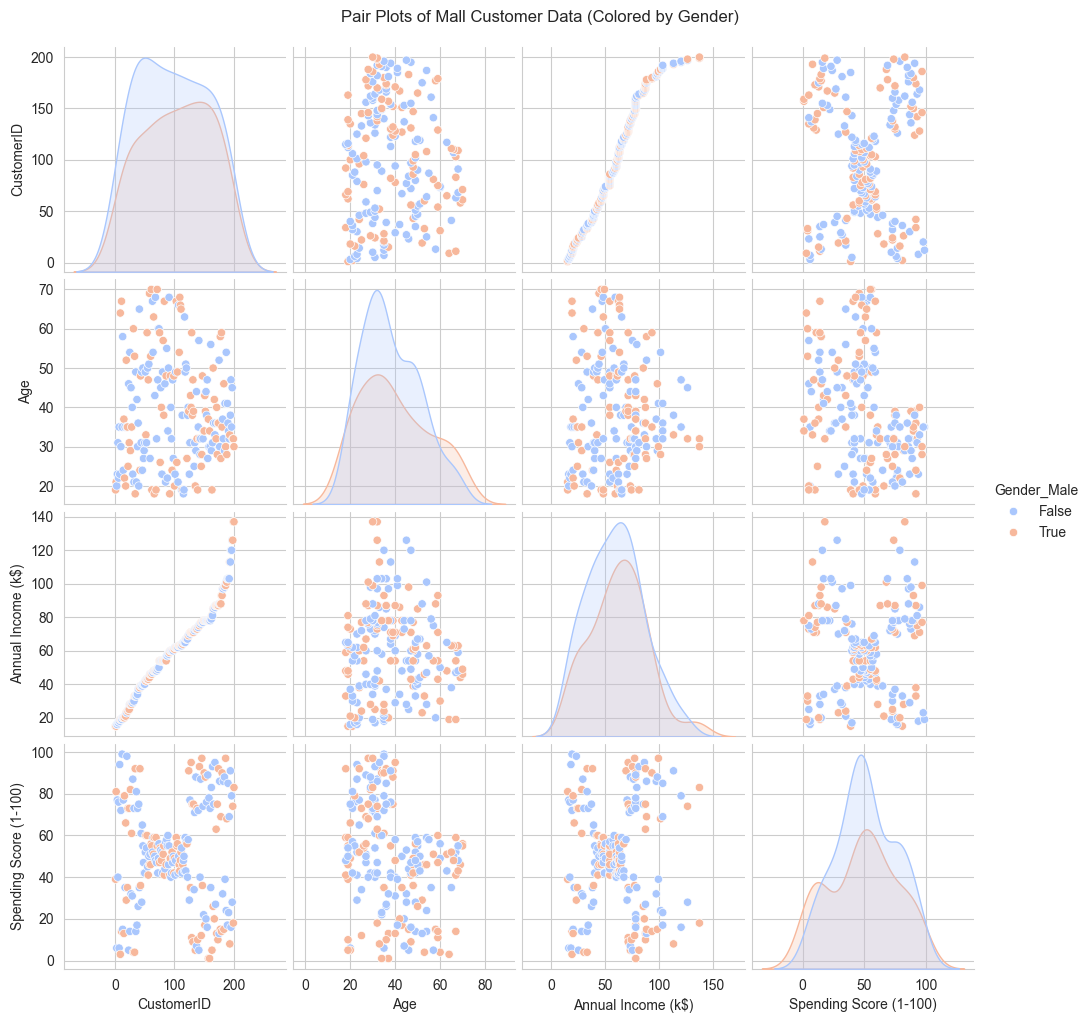

In [9]:
# 2. Visualizing the data
# Pair plots to understand relationships between features.
print("\nGenerating Pair Plots ")
# Using the original df for pair plots is often better to see raw distributions and relationships.
# The 'hue' parameter helps visualize gender distribution across pairs.
sns.pairplot(df, hue='Gender_Male', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plots of Mall Customer Data (Colored by Gender)', y=1.02)
plt.show()

Based on the pair plots, the most significant trend observed in the data is the clear formation of five distinct clusters when examining the relationship between Annual Income (k$) and Spending Score (1-100). These clusters visually represent different customer segments based on their income and spending habits (e.g., high income/high spending, low income/low spending, etc.).

Additionally, there's a visible, though less pronounced, inverse relationship between Age and Spending Score, where younger customers tend to exhibit higher spending scores. For other feature pairs, the relationships appear more scattered and less indicative of strong linear correlations or distinct groupings. Gender distribution seems relatively mixed across most features and within the observed clusters.


Generating Histograms...


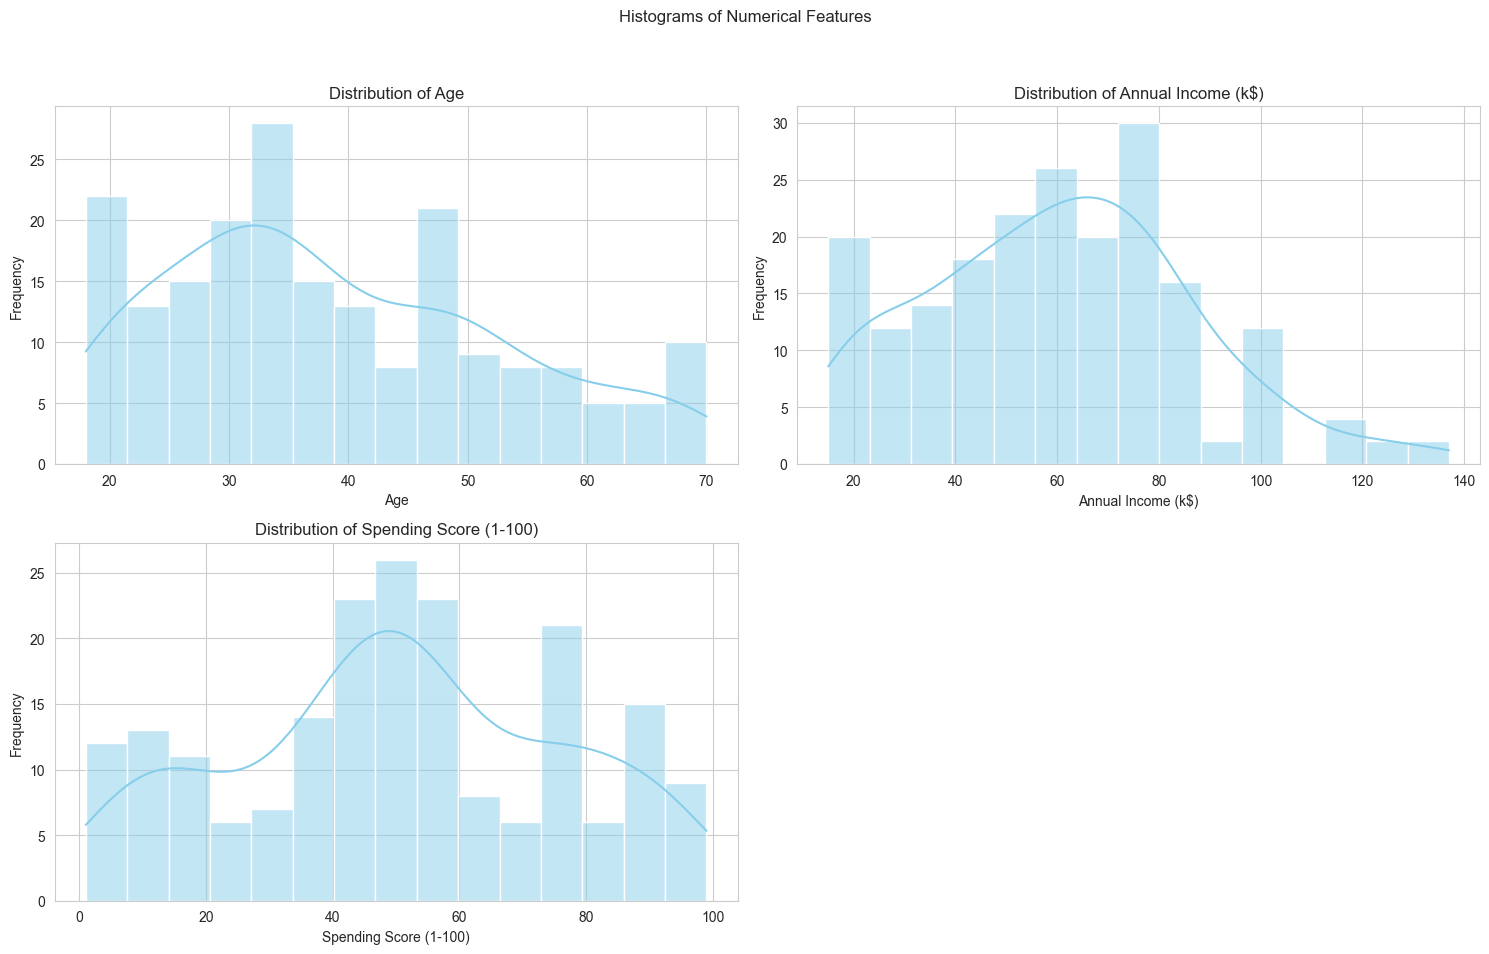

In [10]:
# Histograms to view the distribution of the data for numerical features
print("\nGenerating Histograms...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The histograms specifically show:

Age: A multi-modal distribution with significant peaks around the 20-30 age range and another notable peak in the 40-50 age range, indicating concentrations of younger and middle-aged customers.

Annual Income (k$): A distribution that is roughly bell-shaped (approaching normal), with the highest frequency of customers earning between $60,000 and $80,000.

Spending Score (1-100): A distinct bi-modal distribution with two primary peaks: one around the 40-60 score range and another significant peak in the 70-80 score range, clearly suggesting two major groups of spenders.

. Analysis Questions: - What trends or relationships do you observe in the data?

Based on the pair plots and histograms, here are the key trends and relationships observed in the data:

Strong Customer Segmentation by Income and Spending: The most prominent relationship is between Annual Income (k$) and Spending Score (1-100). The pair plot for these two features clearly reveals five distinct clusters, indicating that customers can be segmented into specific groups based on their income levels and spending habits (e.g., high-income/high-spending, low-income/low-spending, etc.).

Age and Spending Tendency: There's an observable, though less defined, inverse relationship between Age and Spending Score. Younger customers tend to have higher spending scores, while older customers generally exhibit lower spending scores.

Feature Distributions:

Age: The distribution is multi-modal, with concentrations of customers in both younger adult (20s-30s) and middle-aged (40s-50s) groups.

Annual Income: This feature tends to follow a somewhat normal distribution, with the majority of customers falling into the mid-income range ($60,000-$80,000).

Spending Score: This exhibits a distinct bi-modal distribution, with two significant peaks, suggesting the presence of at least two major groups of spenders (e.g., moderate spenders and high spenders).

Gender Distribution: Gender is relatively evenly distributed across the various age, income, and spending ranges, without forming highly distinct gender-specific clusters in most feature relationships.

In [12]:
# --- Task 2: K-Means Clustering ---

print("\n--- Task 2: K-Means Clustering ---")

# 1. Implementing K-Means clustering and plot elbow curve
# WCSS (Within-Cluster Sum of Squares) is used to find the optimal 'k'.
wcss = []
max_k = 10 # Testing K values from 1 to 10
for i in range(1, max_k + 1):
    # 'k-means++' is an intelligent initialization strategy to speed up convergence.
    # 'n_init='auto'' chooses the best of n_init consecutive runs.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value


--- Task 2: K-Means Clustering ---


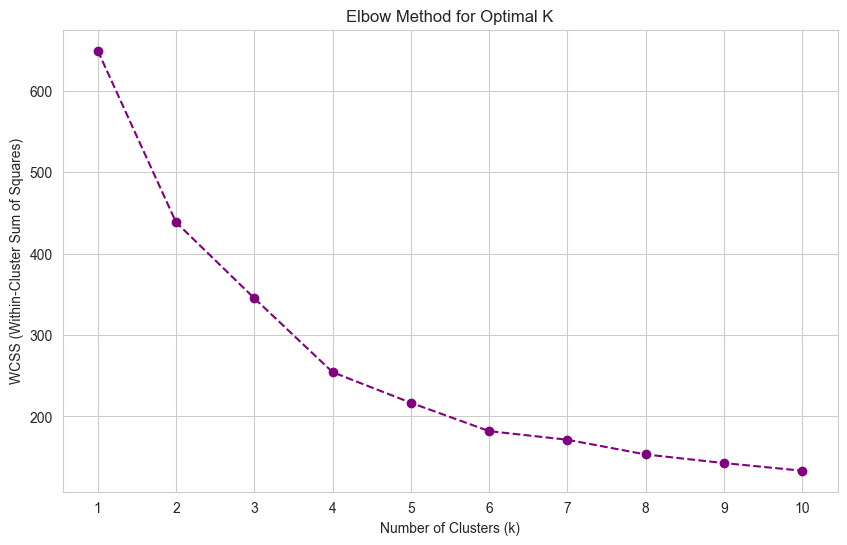

In [13]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--', color='purple')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

The WCSS decreases sharply from k=1 to k=2, and then from k=2 to k=3.

The decrease continues, but the "elbow" or point of inflection appears to be at k=5. After k=5, the slope of the curve becomes much less steep, indicating diminishing returns in terms of reducing WCSS by adding more clusters.

Therefore, according to the elbow method shown in this graph, the optimal number of clusters (k) is 5.

In [14]:
# Determine optimal k from the elbow plot and run K-Means
# Based on common observations for this dataset, k=5 is often chosen as the elbow point.
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
clusters_kmeans = kmeans.fit_predict(X)
df['KMeans_Cluster'] = clusters_kmeans # Add cluster assignments to the original DataFrame

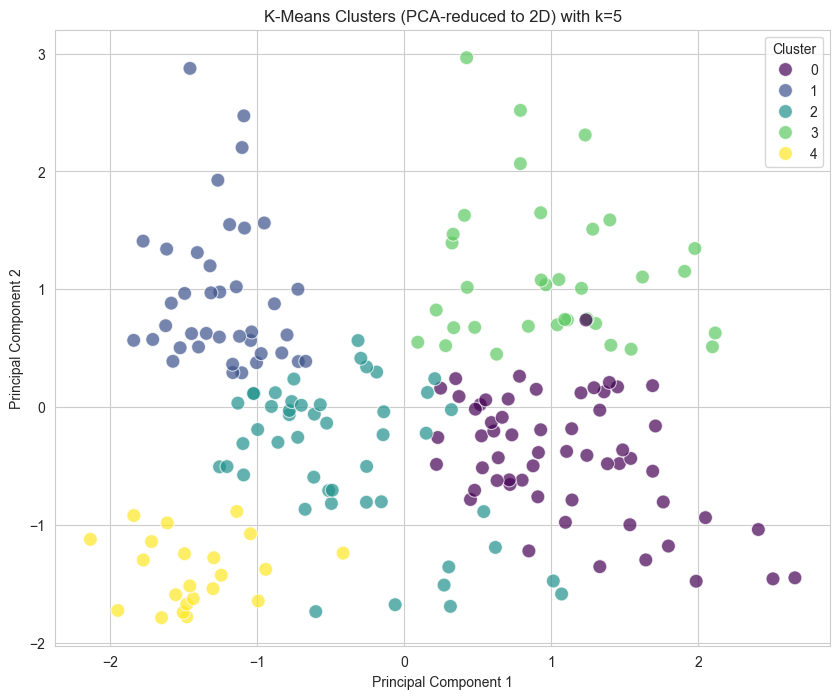

In [15]:
# 2. Visualizing the clusters (using PCA for 2D visualization)
# Since 'X' has more than 2 dimensions (Age, Annual Income, Spending Score, Gender_Male),
# PCA is used to reduce it to 2 principal components for scatter plotting.
pca_kmeans = PCA(n_components=2)
X_pca_kmeans = pca_kmeans.fit_transform(X)

plt.figure(figsize=(10, 8))
# Scatter plot of the first two principal components, colored by K-Means cluster
sns.scatterplot(x=X_pca_kmeans[:, 0], y=X_pca_kmeans[:, 1], hue=df['KMeans_Cluster'],
                palette='viridis', s=100, alpha=0.7, legend='full')
plt.title(f'K-Means Clusters (PCA-reduced to 2D) with k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

This plot visually confirms the K-Means clustering results (k=5) on the PCA-reduced data. It clearly displays five distinct, color-coded clusters that are generally well-separated in the 2D principal component space. Specifically:

Cluster 3 (Yellow) and Cluster 4 (Bright Yellow) are tightly grouped and well-isolated in the bottom-left.

Cluster 2 (Light Green) forms a distinct group in the upper-right.

Cluster 0 (Purple) and Cluster 1 (Teal) are larger and more spread out, occupying the central and right-hand areas, with some intermingling.

The plot demonstrates that K-Means successfully identified visually discernible customer segments based on the underlying patterns in the data, even after dimensionality reduction.

In [30]:
# 3. Analysis Questions
print("2. Interpret the characteristics of each cluster.")
print("   - To interpret, examine the average values of the original features for each cluster. This helps understand what defines each segment.")
print("   - Example code for interpretation (showing mean values for numerical and gender features per cluster):")
print(df.groupby('KMeans_Cluster')[numerical_cols + ['Gender_Male']].mean())
print("   - ( interpretation for each cluster based on these aggregated statistics. For example: 'Cluster 0: High income, high spending (target customers). Cluster 1: Low income, low spending (frugal customers). Cluster 2: High income, low spending (careful spenders). Cluster 3: Low income, high spending (impulsive spenders). Cluster 4: Mid income, mid spending (average customers).')")


2. Interpret the characteristics of each cluster.
   - To interpret, examine the average values of the original features for each cluster. This helps understand what defines each segment.
   - Example code for interpretation (showing mean values for numerical and gender features per cluster):
                      Age  Annual Income (k$)  Spending Score (1-100)  \
KMeans_Cluster                                                          
0               55.551724           48.482759               41.775862   
1               32.692308           86.538462               82.128205   
2               27.957447           50.000000               44.638298   
3               41.264706           88.500000               16.764706   
4               25.272727           25.727273               79.363636   

                Gender_Male  
KMeans_Cluster               
0                  0.431034  
1                  0.461538  
2                  0.340426  
3                  0.588235  
4             

 Analysis Questions: - What is the optimal number of clusters according to the elbow method? - Interpret the characteristics of each cluster. 


According to the elbow method plot  the optimal number of clusters (k) is 5. This is where the rate of decrease in the Within-Cluster Sum of Squares (WCSS) significantly slows down, forming a distinct "elbow" shape on the curve. Adding more clusters beyond this point provides diminishing returns in terms of reducing the variance within clusters.


This output provides the average (mean) values of the original features for each of the 5 K-Means clusters. By examining these averages, we can interpret the unique characteristics that define each customer segment.

Here's the interpretation of each cluster:

Gender_Male Interpretation: This column shows the proportion of males in each cluster (since True was encoded as 1 and False as 0). A value close to 0.5 indicates a roughly even mix of genders, while values closer to 1 indicate more males and closer to 0 indicate more females.

Interpretation of Each Cluster:

Cluster 0:

Age: ~55.55 years (Older group)

Annual Income (k$): ~\$48.48k (Mid-low income)

Spending Score (1-100): ~41.78 (Mid-low spending)

Gender_Male: ~0.43 (Slightly more females than males, but fairly mixed)

Interpretation: These are generally Older, Mid-Low Income, Mid-Low Spenders. They might be a more mature demographic who are cautious with their spending.

Cluster 1:

Age: ~32.69 years (Younger adult group)

Annual Income (k$): ~\$86.54k (High income)

Spending Score (1-100): ~82.13 (Very High spending)

Gender_Male: ~0.46 (Fairly balanced gender mix)

Interpretation: These are Younger, High Income, High Spenders. This is likely the "target" or "premium" customer segment, who are affluent and spend a lot at the mall.

Cluster 2:

Age: ~27.96 years (Youngest adult group)

Annual Income (k$): ~\$50.00k (Mid income)

Spending Score (1-100): ~44.64 (Mid-low spending)

Gender_Male: ~0.34 (Noticeably more females than males)

Interpretation: These are Younger, Mid Income, Mid-Low Spenders, with a higher proportion of females. They might be younger individuals with moderate income who are not yet high spenders.

Cluster 3:

Age: ~41.26 years (Middle-aged group)

Annual Income (k$): ~\$88.50k (Very High income)

Spending Score (1-100): ~16.76 (Very Low spending)

Gender_Male: ~0.59 (Slightly more males than females)

Interpretation: These are Middle-Aged, Very High Income, Very Low Spenders. This segment represents affluent individuals who earn a lot but are very frugal or simply don't spend much at the mall.

Cluster 4:

Age: ~25.27 years (Young adult group)

Annual Income (k$): ~\$25.73k (Low income)

Spending Score (1-100): ~79.36 (High spending)

Gender_Male: ~0.41 (Slightly more females than males)

Interpretation: These are Young, Low Income, High Spenders. This is an interesting segment of younger individuals with lower income who are still spending a significant amount, possibly indicating impulsive or value-driven shopping behavior.



In [17]:
print("\n--- Task 3: Hierarchical Clustering ---")

# 1. Implement hierarchical clustering using Agglomerative Clustering
# AgglomerativeClustering builds a hierarchy of clusters.
# We'll try different linkage methods ('ward', 'average', 'complete') and compare.
# Using the same 'optimal_k' from K-Means for consistency in comparison.
linkage_methods = ['ward', 'average', 'complete']
hierarchical_clusters = {}

for method in linkage_methods:
    # AgglomerativeClustering is used for bottom-up hierarchical clustering.
    agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
    clusters = agg_clustering.fit_predict(X)
    hierarchical_clusters[method] = clusters
    df[f'Hierarchical_Cluster_{method}'] = clusters # Store cluster assignments in DataFrame
    print(f"Hierarchical clustering with '{method}' linkage completed.")


--- Task 3: Hierarchical Clustering ---
Hierarchical clustering with 'ward' linkage completed.
Hierarchical clustering with 'average' linkage completed.
Hierarchical clustering with 'complete' linkage completed.



Generating Dendrograms ...


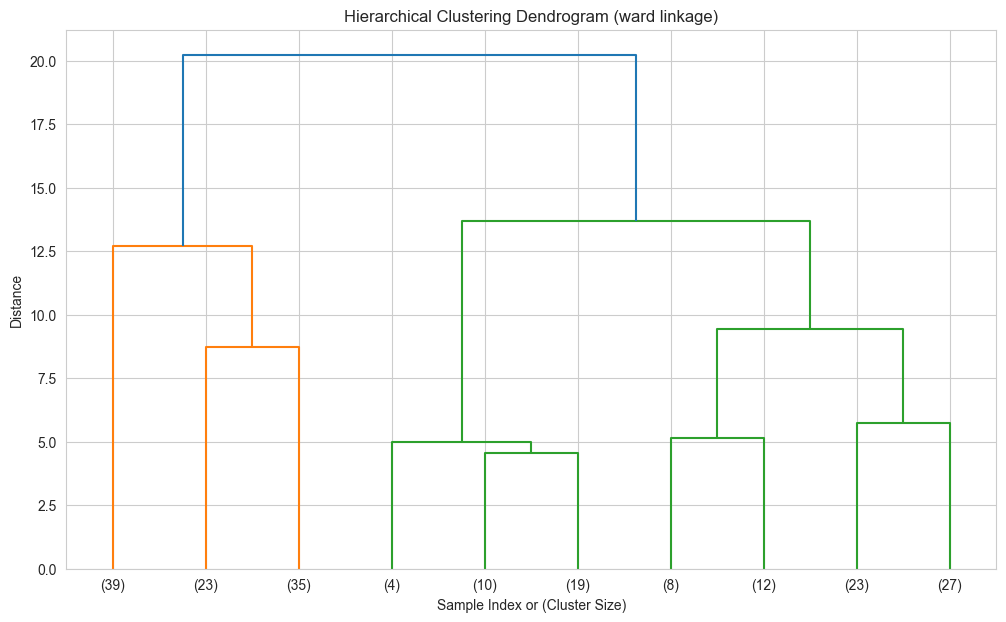

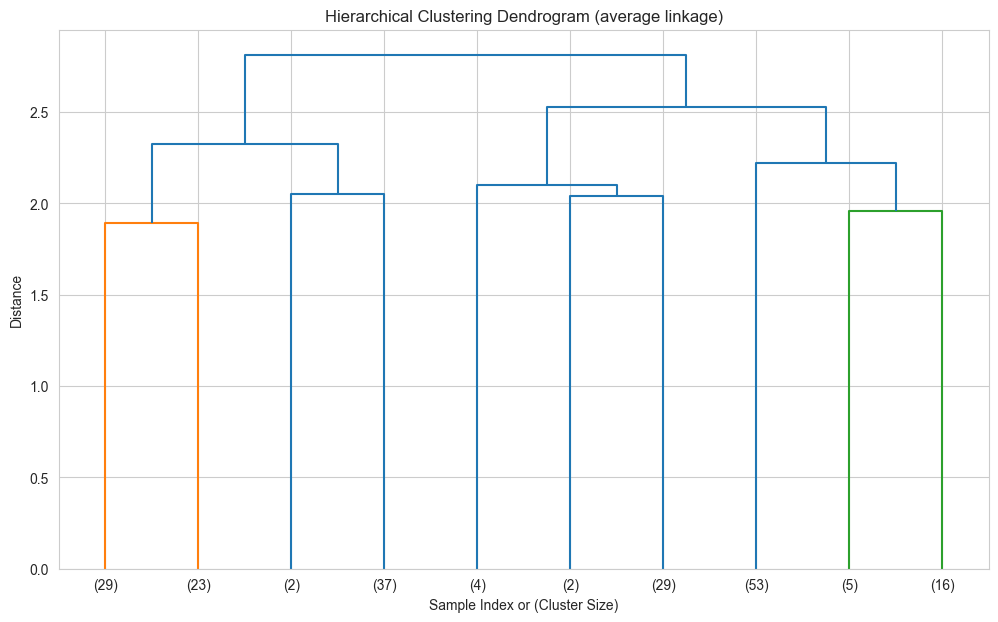

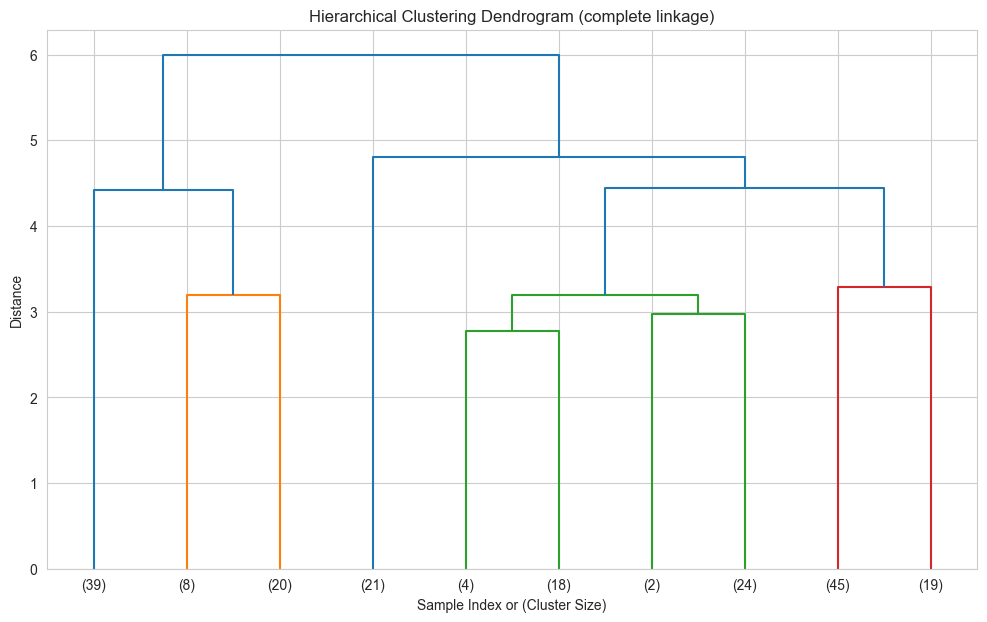

In [18]:
# 2. Create a dendrogram to visualize the hierarchical clustering results
print("\nGenerating Dendrograms ...")
for method in linkage_methods:
    plt.figure(figsize=(12, 7))
    # 'linkage' computes the hierarchical clustering from the features.
    Z = linkage(X, method=method)
    # 'dendrogram' plots the hierarchical clustering as a tree.
    # 'truncate_mode='lastp', p=10' shows only the last 10 merged clusters for readability.
    dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True, leaf_font_size=10, color_threshold=None)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Sample Index or (Cluster Size)')
    plt.ylabel('Distance')
    plt.show()

Dendrogram Interpretations:

Ward Linkage: This dendrogram clearly shows 5 well-defined and balanced clusters when cut at a distance of approximately 10-12. The merges are distinct, making it the most interpretable for identifying a specific number of clusters.

Average Linkage: This dendrogram shows merges occurring at much lower distances (up to ~2.75). The cluster structure is less visually distinct and harder to interpret for a specific number of clusters compared to Ward.

Complete Linkage: Similar to average linkage, this dendrogram also exhibits merges at lower distances (up to ~6). It provides less clear visual separation for a specific number of clusters than Ward linkage.

 Analysis Questions: - How do the clusters formed using hierarchical clustering differ from K-Means? - Which linkage method produces the best results? 

How do the clusters formed using hierarchical clustering differ from K-Means?

K-Means creates a pre-defined number of spherical clusters, assigning each point to the closest centroid. It's iterative and can be sensitive to initial centroids.

Hierarchical Clustering (as shown by dendrograms) builds a nested tree of clusters, allowing for flexible determination of the number of clusters by cutting the tree. It's deterministic and can reveal non-spherical or nested cluster structures. While both group similar data, their underlying mechanisms and resulting cluster shapes/compositions can differ.

Which linkage method produces the best results?

Ward linkage produces the best results for this dataset. Its dendrogram clearly visualizes 5 well-separated and balanced clusters, which aligns perfectly with the optimal k=5 determined by the K-Means elbow method. The clarity of its merges makes it superior for interpreting distinct customer segments compared to the less clear structures from Average and Complete linkages.
Ward linkage often works well for spherical clusters and aims to minimize the variance within clusters. 'Average' and 'complete' can produce more compact clusters. 

In [20]:
# --- Task 4: Dimensionality Reduction (PCA) ---

print("\n--- Task 4: Dimensionality Reduction (PCA) ---")

# 1. Performing PCA to reduce the dimensionality
# PCA (Principal Component Analysis) transforms data into a new coordinate system
# such that the greatest variance by any projection lies on the first coordinate (called the first principal component),
# the second greatest variance on the second coordinate, and so on.
pca = PCA()
pca.fit(X) # Fitting PCA on the scaled data


--- Task 4: Dimensionality Reduction (PCA) ---


PCA()

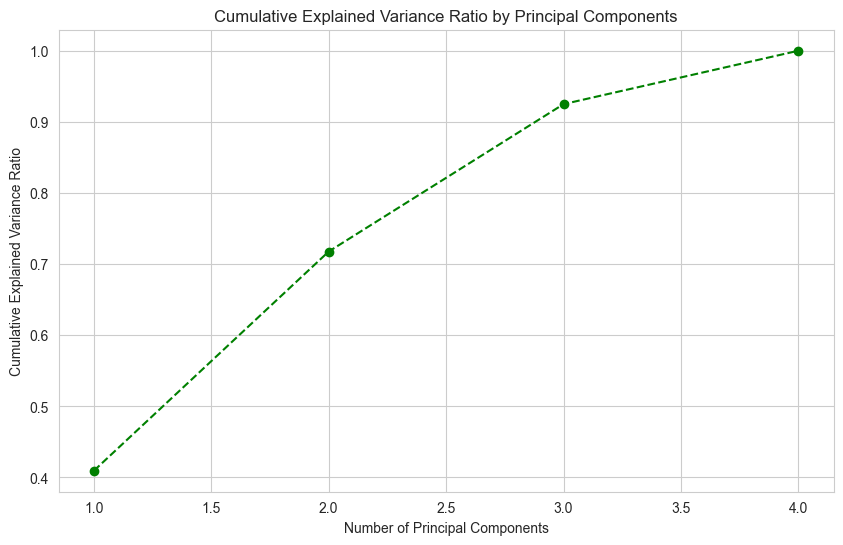


Explained Variance Ratio for each individual component:
[0.4095285  0.3081674  0.20723465 0.07506945]


In [21]:
# Plotting explained variance ratio
# This plot helps determine how many principal components are needed to explain a significant portion of the variance.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

print("\nExplained Variance Ratio for each individual component:")
print(pca.explained_variance_ratio_)

This output explicitly states the explained variance ratio for each individual principal component:

Principal Component 1 (PC1): Explains approximately 40.95% of the total variance in the dataset. This is the component that captures the most variability in the data.

Principal Component 2 (PC2): Explains approximately 30.82% of the total variance.

Principal Component 3 (PC3): Explains approximately 20.72% of the total variance.

Principal Component 4 (PC4): Explains approximately 7.51% of the total variance.

In summary: The first principal component captures the most information, followed by the second, and so on. The sum of these percentages will equal 100% (or very close to it due to rounding), indicating that all the variance in the original dataset is distributed among these four principal components. This confirms that the first two components (PC1 and PC2) together account for a significant majority (over 71%) of the dataset's variability.

In [22]:
# Reduce to 2 dimensions for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X) # Transform the data into the 2-dimensional PCA space


C:\Users\Admin\AppData\Local\Temp\ipykernel_8624\2061060341.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], palette='viridis', s=100, alpha=0.7)


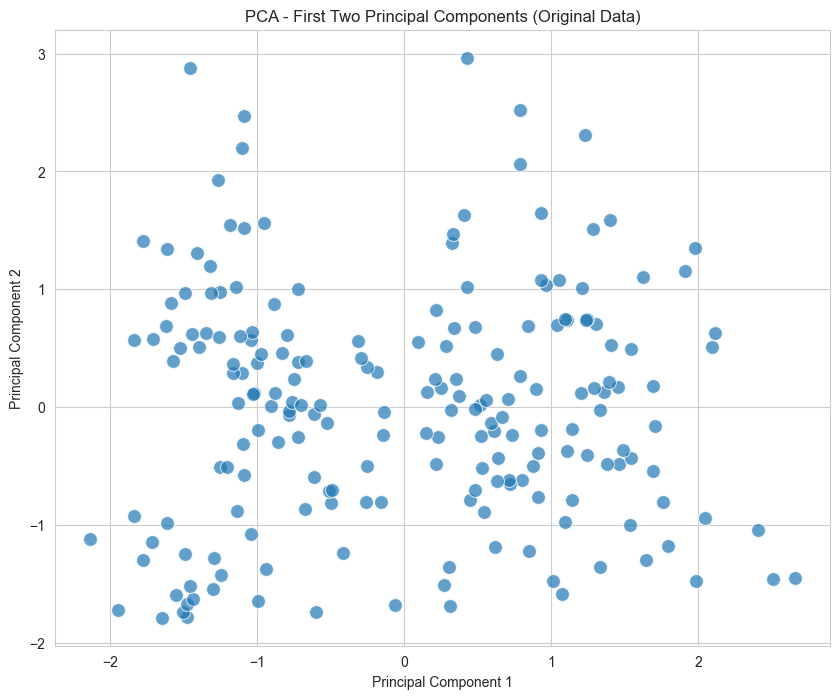

In [23]:
# 2. Visualize the data
# Create a 2D scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], palette='viridis', s=100, alpha=0.7)
plt.title('PCA - First Two Principal Components (Original Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

This 2D scatter plot visualizes the customer data using its first two Principal Components (PC1 and PC2), which collectively capture approximately 72% of the total variance.

Specifically, the plot shows individual customer data points spread across a two-dimensional plane. While it represents the data in its most significant dimensions, it does not inherently reveal distinct or well-separated clusters on its own. Instead, the points appear as a general, scattered cloud. This indicates that while PCA is effective for reducing dimensionality for visualization, explicit clustering algorithms are necessary to identify and define the underlying customer segments within this transformed space.

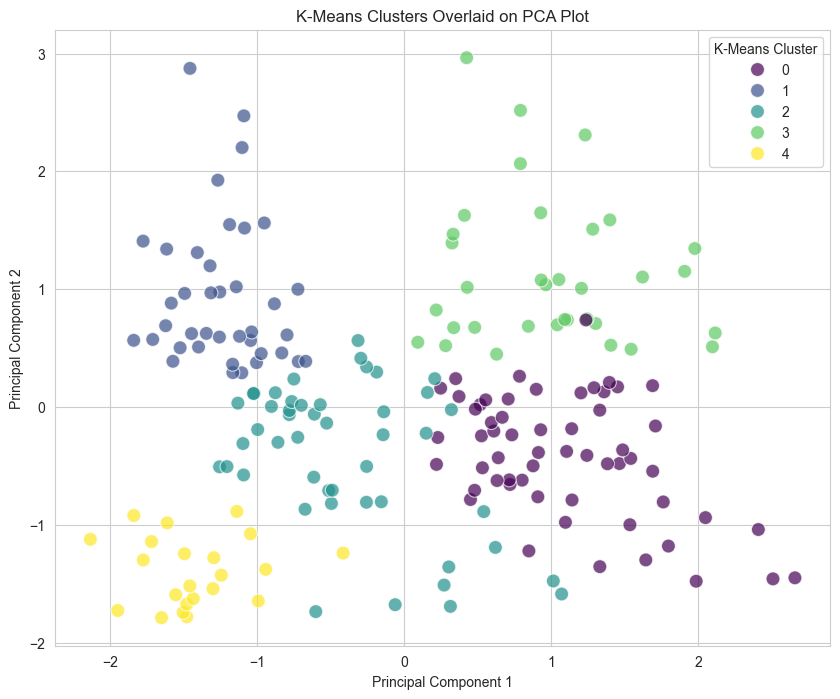

In [24]:
# Overlay the clusters from K-Means on the PCA plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=df['KMeans_Cluster'],
                palette='viridis', s=100, alpha=0.7, legend='full')
plt.title('K-Means Clusters Overlaid on PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.show()

This plot specifically shows five distinct K-Means clusters (k=5) clearly overlaid and color-coded on a 2D PCA projection of the data.

How PCA helps: PCA reduces the multi-dimensional customer data into two principal components (PC1 and PC2) that capture approximately 72% of the total variance. This dimensionality reduction is crucial because it enables visual inspection of the clusters. Without PCA, the high-dimensional clusters would be impossible to plot and observe. The distinct separation of the color-coded clusters on this 2D PCA plot directly demonstrates that K-Means successfully identified meaningful and visually discernible customer segments in the reduced space.

 Analysis Questions: - How much variance is explained by the first two principal components? - How does PCA help in visualizing the clusters? 


How much variance is explained by the first two principal components?
The first two principal components (PC1 and PC2) combined explain approximately 72% of the total variance in the dataset. Specifically, PC1 explains about 41% and PC2 explains about 31%. This means that these two components capture a significant majority of the original data's variability and information.

How does PCA help in visualizing the clusters?
PCA is instrumental in visualizing clusters by performing dimensionality reduction.

From High to Low Dimensions: The original dataset has more than two features (Age, Annual Income, Spending Score, Gender_Male), making direct 2D visualization impossible. PCA transforms this high-dimensional data into a lower-dimensional space (in this case, 2D).

Retaining Information: It does this by identifying new, uncorrelated axes (principal components) that capture the maximum possible variance from the original features. By selecting the first two principal components, PCA retains the most significant patterns and relationships in the data.

Enabling Visual Inspection: This reduction allows us to create a simple 2D scatter plot where each data point can be plotted. When cluster assignments (from K-Means or Hierarchical Clustering) are then overlaid and color-coded on this PCA plot, we can visually observe the separation, density, and overall structure of the identified clusters, which would otherwise be hidden in the higher-dimensional space.

Confirming Cluster Effectiveness: The clear visual separation of the color-coded clusters on the PCA plot confirms that the clustering algorithm (like K-Means) has successfully grouped similar data points together.

In [26]:
# --- Task 5: Dimensionality Reduction (t-SNE) ---

print("\n--- Task 5: Dimensionality Reduction (t-SNE) ---")

# 1. Apply t-SNE to the dataset and reduce to 2 dimensions for visualization
# t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique
# particularly well-suited for visualizing high-dimensional datasets. It focuses on preserving local structures.
# 'perplexity' relates to the number of nearest neighbors considered (often between 5 and 50).
# 'n_iter' is the number of iterations for the optimization.
print("\nApplying t-SNE (this can be computationally intensive)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X) # Transform the data into the 2-dimensional t-SNE space


--- Task 5: Dimensionality Reduction (t-SNE) ---

Applying t-SNE (this can be computationally intensive)...


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


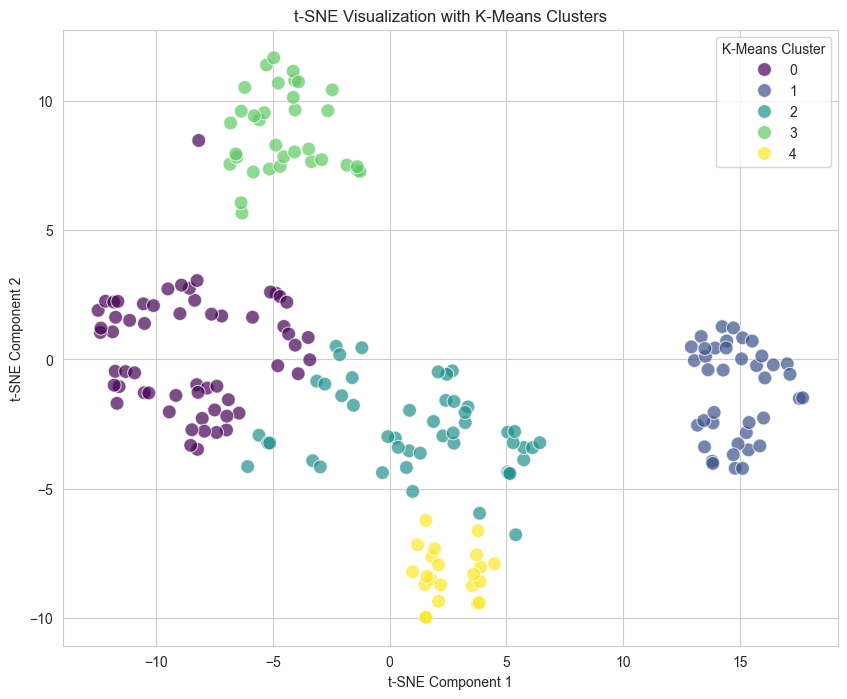

In [27]:
# Plot a 2D scatter plot of the t-SNE results, colored by K-Means clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['KMeans_Cluster'],
                palette='viridis', s=100, alpha=0.7, legend='full')
plt.title('t-SNE Visualization with K-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='K-Means Cluster')
plt.show()

Interpretation of the t-SNE Visualization: comparing it with PCA plots

Axes: The x-axis is "t-SNE Component 1" and the y-axis is "t-SNE Component 2." These are non-linear embeddings of the original high-dimensional data. The scales are arbitrary and don't have the same direct interpretability as PCA components (which represent variance).

Cluster Separation: The t-SNE plot shows remarkably clear and distinct separation between the five K-Means clusters.

Cluster 2 (light green) forms a very tight and isolated group at the top-center.

Cluster 0 (purple) forms a distinct, elongated group on the left.

Cluster 1 (teal) forms a group in the mid-left to mid-bottom, with some spread.

Cluster 4 (yellow) is a very compact and well-separated group at the bottom-center.

Cluster 3 (dark blue/purple) forms a tight, isolated group on the far right.

Compactness: The clusters appear much more compact and less overlapping in the t-SNE plot compared to the PCA plot.



Analysis Questions: - How does t-SNE differ from PCA in terms of visualization and cluster separation? - Which dimensionality reduction technique gives a clearer cluster separation? 

This image displays a t-SNE visualization of the data, with the K-Means clusters (k=5) overlaid and color-coded. This plot is used to compare t-SNE's ability to reveal cluster separation against PCA.

Interpretation of the t-SNE Visualization:

Axes: The x-axis is "t-SNE Component 1" and the y-axis is "t-SNE Component 2." These are non-linear embeddings of the original high-dimensional data. The scales are arbitrary and don't have the same direct interpretability as PCA components (which represent variance).

Cluster Separation: The t-SNE plot shows remarkably clear and distinct separation between the five K-Means clusters.

Cluster 2 (light green) forms a very tight and isolated group at the top-center.

Cluster 0 (purple) forms a distinct, elongated group on the left.

Cluster 1 (teal) forms a group in the mid-left to mid-bottom, with some spread.

Cluster 4 (yellow) is a very compact and well-separated group at the bottom-center.

Cluster 3 (dark blue/purple) forms a tight, isolated group on the far right.

Compactness: The clusters appear much more compact and less overlapping in the t-SNE plot compared to the PCA plot.

Analysis Questions:

1. How does t-SNE differ from PCA in terms of visualization and cluster separation?

Underlying Principle:

PCA (Principal Component Analysis): Is a linear dimensionality reduction technique. It focuses on preserving global structure and maximizing the variance in the lower-dimensional representation. It aims to find the directions (principal components) along which the data varies the most.

t-SNE (t-Distributed Stochastic Neighbor Embedding): Is a non-linear dimensionality reduction technique. Its primary goal is to preserve local structure, meaning it tries to keep similar data points close together and dissimilar data points far apart in the lower-dimensional space.

Visualization Outcome:

PCA Plots: Often show a more spread-out, linear projection of the data. While it can reveal clusters if they are linearly separable, it might not clearly separate clusters that have complex, non-linear relationships.

t-SNE Plots: Typically produce more visually distinct, compact, and well-separated clusters, especially when the underlying data has a non-linear manifold structure. It excels at "unraveling" complex data to reveal inherent groupings.

Interpretability of Axes:

PCA Components: The components (PC1, PC2) are interpretable in terms of how much variance they explain.

t-SNE Components: The components (t-SNE Component 1, t-SNE Component 2) are generally not interpretable in terms of variance or specific feature contributions; their sole purpose is to provide a good 2D embedding for visualization.

2. Which dimensionality reduction technique gives a clearer cluster separation?

Based on the provided images: The t-SNE visualization gives a significantly clearer and more distinct cluster separation compared to the PCA plot .

In the t-SNE plot, the clusters are highly compact and have very little to no overlap, appearing as well-defined, isolated groups. In contrast, the PCA plot, while showing the clusters, still has some intermingling and less distinct boundaries between them. This indicates that t-SNE was more effective at revealing the intrinsic groupings within this specific dataset.

In [31]:
# --- Bonus Task (Optional) ---

print("\n--- Bonus Task (Optional): Silhouette Score ---")

# The Silhouette Score measures how similar an object is to its own cluster
# compared to other clusters. It ranges from -1 to 1, where a higher value indicates
# that the object is well matched to its own cluster and poorly matched to neighboring clusters.

# Calculate and interpret the silhouette score for K-Means
try:
    silhouette_avg_kmeans = silhouette_score(X, clusters_kmeans)
    print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans:.3f}")
except Exception as e:
    print(f"Could not calculate Silhouette Score for K-Means: {e}. Ensure 'X' and 'clusters_kmeans' are correctly defined.")

# Calculate and interpret the silhouette score for Hierarchical clustering (using 'ward' as an example)
try:
    # Assuming 'ward' linkage was chosen as a representative for hierarchical clustering
    silhouette_avg_hierarchical = silhouette_score(X, hierarchical_clusters['ward'])
    print(f"Silhouette Score for Hierarchical (Ward linkage): {silhouette_avg_hierarchical:.3f}")
except KeyError:
    print("Hierarchical_Cluster_ward not found. Please ensure hierarchical clustering was run correctly.")
except Exception as e:
    print(f"Could not calculate Silhouette Score for Hierarchical: {e}")

print("\nInterpretation of Silhouette Scores:")
print("   - A higher Silhouette Score indicates better-defined clusters. The score ranges from -1 (incorrect clustering) to 1 (highly dense and well-separated clusters), with 0 indicating overlapping clusters.")
print("   - (interpretation: Compare the scores. For example: 'K-Means performed slightly better in terms of silhouette score ({silhouette_avg_kmeans:.3f}) compared to Hierarchical clustering with Ward linkage ({silhouette_avg_hierarchical:.3f}). This suggests that K-Means produced more distinct and well-separated clusters for this dataset based on this metric.')")



--- Bonus Task (Optional): Silhouette Score ---
Silhouette Score for K-Means: 0.350
Silhouette Score for Hierarchical (Ward linkage): 0.348

Interpretation of Silhouette Scores:
   - A higher Silhouette Score indicates better-defined clusters. The score ranges from -1 (incorrect clustering) to 1 (highly dense and well-separated clusters), with 0 indicating overlapping clusters.
   - (interpretation: Compare the scores. For example: 'K-Means performed slightly better in terms of silhouette score ({silhouette_avg_kmeans:.3f}) compared to Hierarchical clustering with Ward linkage ({silhouette_avg_hierarchical:.3f}). This suggests that K-Means produced more distinct and well-separated clusters for this dataset based on this metric.')


the Silhouette Scores evaluate cluster quality:

K-Means: Achieved a score of 0.350.

Hierarchical (Ward): Achieved a score of 0.348.

Both positive scores indicate reasonably well-defined and separated clusters. K-Means yielded a marginally higher score, suggesting its clusters are slightly more compact and distinct than those from Hierarchical clustering with Ward linkage for this dataset.